In [20]:
import sys
sys.path.append('..')

In [25]:
from src.data_loader import download_stock_data, get_data_info
from src.strategy import calculate_sma,gnerate_signals

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] =(14,7)

print("All imports successful.")


All imports successful.


In [11]:
ticker = "RELIANCE.NS"
print(f"Downloading {ticker} data for the last 5 years")
df = download_stock_data(ticker, period="5y", interval = "1d")





Succesfully downloaded 1239 rows of data

Date range: 2021-01-18 to 2026-01-16


In [12]:
get_data_info(df)


Data Information
Total rows:1239
Date range: 2021-01-18 to 2026-01-16

 columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

 Missing values: Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
                                 Open        High         Low       Close  \
Date                                                                        
2021-01-18 00:00:00+05:30  883.782898  905.502249  872.107058  899.584961   
2021-01-19 00:00:00+05:30  904.436662  920.918882  904.436662  914.298828   
2021-01-20 00:00:00+05:30  916.565925  933.161484  907.497256  931.665161   
2021-01-21 00:00:00+05:30  944.043896  961.274278  940.869907  951.933594   
2021-01-22 00:00:00+05:30  957.193372  959.165841  922.800612  929.352722   

                             Volume  Dividends  Stock Splits  
Date                                                          
2021-01-18 00:00:00+05:

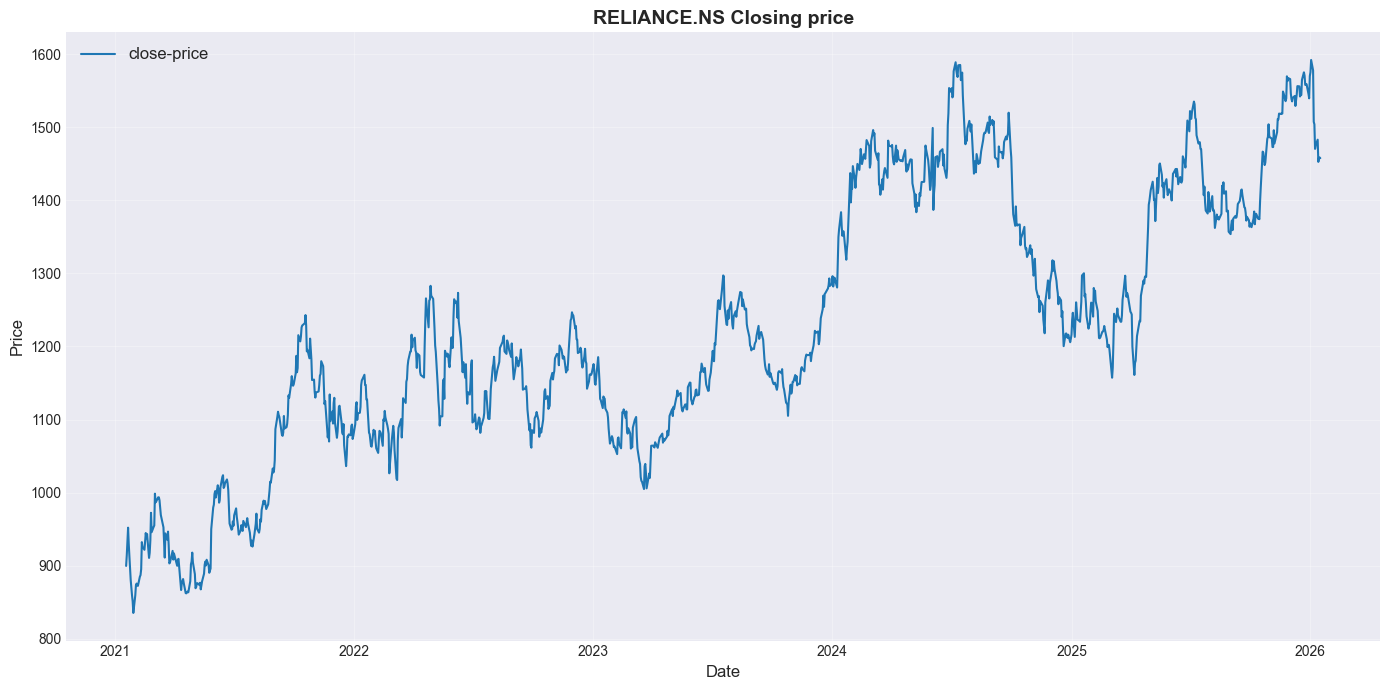

In [14]:
plt.figure(figsize= (14,7))
plt.plot(df.index, df['Close'], label = "close-price", linewidth = 1.5)
plt.title(f"{ticker} Closing price", fontsize = 14, fontweight = "bold")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

In [15]:
df_SMA = calculate_sma(df, short_window=20, long_window=50)
df_SMA[['Close', 'SMA_20', 'SMA_50']].tail()

Calculated SMA 20 and SMA 50


,Close,SMA_20,SMA_50
Date,,,
2026-01-12 00:00:00+05:30,1483.199951,1543.029993,1534.560000
2026-01-13 00:00:00+05:30,1452.800049,1538.554993,1534.154001
2026-01-14 00:00:00+05:30,1458.800049,1534.274994,1533.868003
2026-01-15 00:00:00+05:30,1458.800049,1529.994995,1533.122004
2026-01-16 00:00:00+05:30,1457.900024,1524.634998,1532.720005


In [ ]:
df_signals = generate